<a href="https://colab.research.google.com/github/sanjogmish/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_Modelling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# NAIVE BAYES CLASSIFIER

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
X_train_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/X_train_df')
X_test_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/X_test_df')
y_train_series = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/y_train_series')
y_test_series = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/files/y_test_series')

In [4]:
X_train_df

,Unnamed: 0,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,> 2 Years,1-2 Year,< 1 Year
0,0,1.0,0.660377,1.0,0.040000,1.0,0.0,0.514469,0.199483,0.830340,0.0,1.0,0.0
1,1,1.0,0.302888,1.0,0.079150,0.0,1.0,0.482469,0.028254,0.972147,0.0,0.0,1.0
2,2,0.0,0.096593,1.0,0.040000,1.0,0.0,0.507433,0.028254,0.830340,0.0,0.0,1.0
3,3,1.0,0.646956,1.0,0.187724,0.0,1.0,0.504804,0.190246,0.501713,0.0,1.0,0.0
4,4,0.0,0.126007,1.0,0.059212,1.0,0.0,0.465519,0.028254,0.796987,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534849,534849,1.0,0.619308,1.0,0.096761,0.0,1.0,0.453632,0.308744,0.959516,0.0,1.0,0.0
534850,534850,1.0,0.366730,1.0,0.073512,0.0,1.0,0.490144,0.229386,0.852791,0.0,1.0,0.0
534851,534851,0.0,0.484052,1.0,0.126357,0.0,1.0,0.409934,0.229691,0.299884,0.0,1.0,0.0
534852,534852,1.0,0.444390,1.0,0.187724,0.0,1.0,0.548441,0.175655,0.767568,0.0,1.0,0.0


In [5]:
y_train_series

,Unnamed: 0,Response
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
534849,534849,1
534850,534850,1
534851,534851,1
534852,534852,1


In [6]:
X_train_df.drop('Unnamed: 0',axis=1,inplace =True)
X_test_df.drop('Unnamed: 0',axis=1,inplace=True)
y_train_series.drop('Unnamed: 0',axis=1,inplace=True)
y_test_series.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
X_train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,> 2 Years,1-2 Year,< 1 Year
0,1.0,0.660377,1.0,0.040000,1.0,0.0,0.514469,0.199483,0.830340,0.0,1.0,0.0
1,1.0,0.302888,1.0,0.079150,0.0,1.0,0.482469,0.028254,0.972147,0.0,0.0,1.0
2,0.0,0.096593,1.0,0.040000,1.0,0.0,0.507433,0.028254,0.830340,0.0,0.0,1.0
3,1.0,0.646956,1.0,0.187724,0.0,1.0,0.504804,0.190246,0.501713,0.0,1.0,0.0
4,0.0,0.126007,1.0,0.059212,1.0,0.0,0.465519,0.028254,0.796987,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
534849,1.0,0.619308,1.0,0.096761,0.0,1.0,0.453632,0.308744,0.959516,0.0,1.0,0.0
534850,1.0,0.366730,1.0,0.073512,0.0,1.0,0.490144,0.229386,0.852791,0.0,1.0,0.0
534851,0.0,0.484052,1.0,0.126357,0.0,1.0,0.409934,0.229691,0.299884,0.0,1.0,0.0
534852,1.0,0.444390,1.0,0.187724,0.0,1.0,0.548441,0.175655,0.767568,0.0,1.0,0.0


In [8]:
y_train_series

,Response
0,0
1,0
2,0
3,0
4,0
...,...
534849,1
534850,1
534851,1
534852,1


In [9]:
y_train_series.values.reshape(-1)

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
from sklearn.naive_bayes import GaussianNB
gaussian_estimator = GaussianNB().fit(X_train_df.values,y_train_series.values.reshape(-1))

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score,precision_score,log_loss,f1_score,roc_auc_score,classification_report

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def get_metric(model):

    train_preds = model.predict(X_train_df.values)
    test_preds = model.predict(X_test_df.values)

    print("The classification report for training is \n")
    print(classification_report(y_train_series.values.reshape(-1),train_preds),"\n")
    
    print("The classification report for testing is \n")
    print(classification_report(y_test_series.values.reshape(-1),test_preds),"\n")
    
    
    metrics = [roc_auc_score,accuracy_score,recall_score,precision_score,log_loss,f1_score]
    metric_name = ['Roc Auc','Accuracy','Recall','Precision','Log loss','F1 score']
    
    zipped_list = []
    for i in metrics:
        tr = round(i(y_train_series.values.reshape(-1),train_preds),2)
        ts = round(i(y_test_series.values.reshape(-1),test_preds),2)
        zipped_list.append((tr,ts))
    metric_df = pd.DataFrame(zipped_list,index=metric_name,columns=['Train','Test'])

    for i in [confusion_matrix(y_train_series.values.reshape(-1),train_preds) , confusion_matrix(y_test_series.values.reshape(-1),test_preds)]:
      print('Confusion Matrix for train set \n',i,'\n')
    
    true_dict = pd.Series(y_test_series.values.reshape(-1)).value_counts().to_dict()
    pred_dict = pd.Series(test_preds).value_counts().to_dict()

    tmp_df = pd.DataFrame(zip(true_dict.values(),pred_dict.values()),columns = ['Actual','Predicted'],index=[0,1])
    tmp_df = tmp_df.div(tmp_df.sum(axis=0), axis=1)
    tmp_df.plot(kind='bar', rot=0, xlabel='Response',ylabel='Percentages', figsize=(14, 6))
#    plt.ylim((0, 100))
    
    
    return metric_df

The classification report for training is 

              precision    recall  f1-score   support

           0       0.87      0.69      0.77    267427
           1       0.74      0.90      0.81    267427

    accuracy                           0.79    534854
   macro avg       0.80      0.79      0.79    534854
weighted avg       0.80      0.79      0.79    534854
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     66972
           1       0.28      0.89      0.43      9250

    accuracy                           0.71     76222
   macro avg       0.63      0.79      0.62     76222
weighted avg       0.89      0.71      0.76     76222
 

Confusion Matrix for train set 
 [[183260  84167]
 [ 27757 239670]] 

Confusion Matrix for train set 
 [[45891 21081]
 [ 1006  8244]] 



,Train,Test
Roc Auc,0.79,0.79
Accuracy,0.79,0.71
Recall,0.90,0.89
Precision,0.74,0.28
Log loss,7.23,10.01
F1 score,0.81,0.43


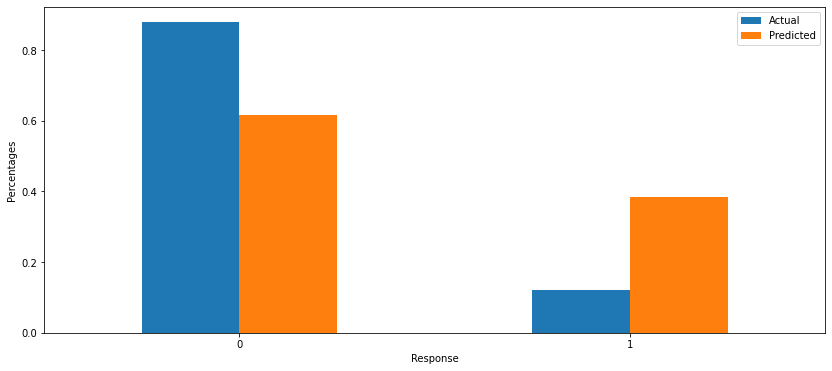

In [14]:
get_metric(gaussian_estimator)

In [16]:
from sklearn.model_selection import cross_validate

In [17]:
gaussian =  GaussianNB()
scoring = ['accuracy']
scores = cross_validate(gaussian,X_train_df, y_train_series, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.791, test=0.790), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.791, test=0.792), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.791, test=0.791), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.791, test=0.789), total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.5s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.790, test=0.792), total=   0.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


In [18]:
scores['train_accuracy']

array([0.79093117, 0.79050348, 0.79079561, 0.79103166, 0.79043853])

In [19]:
scores['test_accuracy']

array([0.7900272 , 0.79167251, 0.79056941, 0.78943826, 0.79201645])

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train_df.values,y_train_series.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The classification report for training is 

              precision    recall  f1-score   support

           0       0.90      0.66      0.76    267427
           1       0.73      0.92      0.82    267427

    accuracy                           0.79    534854
   macro avg       0.81      0.79      0.79    534854
weighted avg       0.81      0.79      0.79    534854
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.98      0.66      0.79     66972
           1       0.27      0.92      0.42      9250

    accuracy                           0.69     76222
   macro avg       0.63      0.79      0.61     76222
weighted avg       0.90      0.69      0.75     76222
 

Confusion Matrix for train set 
 [[176921  90506]
 [ 20466 246961]] 

Confusion Matrix for train set 
 [[44330 22642]
 [  778  8472]] 



,Train,Test
Roc Auc,0.79,0.79
Accuracy,0.79,0.69
Recall,0.92,0.92
Precision,0.73,0.27
Log loss,7.17,10.61
F1 score,0.82,0.42


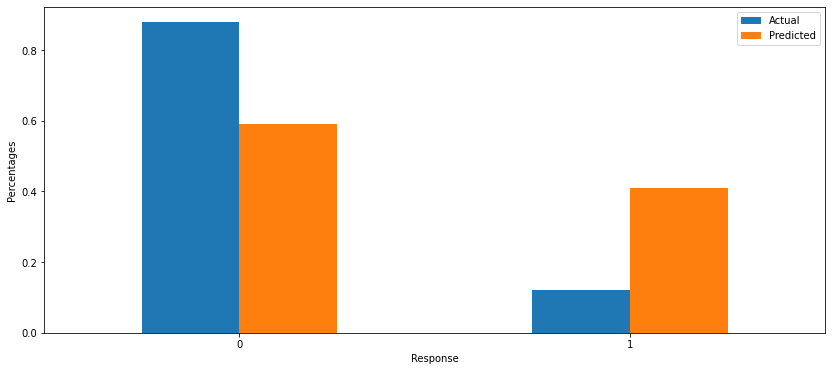

In [21]:
get_metric(clf)

In [22]:
from sklearn.linear_model import LogisticRegressionCV

In [23]:
logistic = LogisticRegression()
scoring = ['accuracy']
scores = cross_validate(logistic,X_train_df, y_train_series, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  ................................................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.793, test=0.791), total=   8.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.792, test=0.793), total=   6.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.2s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.792, test=0.793), total=   7.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.7s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.793, test=0.791), total=   6.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   29.3s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.792, test=0.794), total=   7.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.0s finished


In [24]:
scores['train_accuracy']

array([0.79297144, 0.79237549, 0.79229369, 0.79275176, 0.79206046])

In [25]:
scores['test_accuracy']

array([0.79084051, 0.79343   , 0.79318694, 0.79103682, 0.7941105 ])

In [26]:
for model in scores['estimator']:
    print(model.coef_)

[[ 1.09135753e-01 -1.25389958e+00  1.53777327e+00  3.06289984e+00
  -3.95459612e+00  1.92561875e+00  2.88601962e-01  6.89773087e+00
   3.95771951e-03 -6.49733644e-01 -8.03546990e-01 -1.15165065e+00]]
[[ 0.1213904  -1.2310376   1.44458362  2.99184586 -3.96764407  1.91815834
   0.2964332   6.64611961 -0.02512392 -0.64337111 -0.80184785 -1.16930671]]
[[ 1.13901173e-01 -1.27744596e+00  1.50148303e+00  3.10683226e+00
  -3.92571884e+00  1.91596703e+00  3.03127316e-01  6.70630021e+00
   7.96742495e-04 -6.74627813e-01 -8.15077180e-01 -1.20083002e+00]]
[[ 1.07333086e-01 -1.24275687e+00  1.41244008e+00  2.95309106e+00
  -3.96565406e+00  1.93972634e+00  3.01230192e-01  6.67901366e+00
   2.53246660e-03 -6.47791295e-01 -8.00393885e-01 -1.18342333e+00]]
[[ 0.11522363 -1.28873367  1.53578669  3.11905236 -3.9428186   1.92025255
   0.29058482  6.69183639 -0.01022116 -0.67724527 -0.8135238  -1.2031081 ]]


# **PCA**

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)

In [28]:
X_train_df_pca = pca.fit_transform(X_train_df)

In [29]:
pca.explained_variance_

array([0.58947989, 0.25719386, 0.23670546, 0.09438684, 0.05163556,
       0.03696365])

In [30]:
X_train_df_pca

array([[ 0.13045799,  1.17404548, -0.319504  ,  0.15399003, -0.091098  ,
         0.10574189],
       [ 0.43767722, -0.7784621 , -0.59236124, -0.23038139, -0.23262824,
         0.09572201],
       [ 1.48534352,  0.17405261,  0.37261872,  0.00543135, -0.09003617,
         0.09101421],
       ...,
       [-0.52513124, -0.08049783,  0.66206633, -0.08694445,  0.43858554,
         0.01750155],
       [-0.66466191,  0.03609501, -0.31821951, -0.14984423, -0.02997298,
         0.1572941 ],
       [-0.52031602, -0.08203579,  0.66123995, -0.08127333,  0.03819602,
         0.13313949]])

In [31]:
X_test_df_pca = pca.transform(X_test_df)

In [32]:
from sklearn.naive_bayes import GaussianNB
gaussian_estimator = GaussianNB().fit(X_train_df_pca,y_train_series.values.reshape(-1))

In [33]:
def get_metric(model):

    train_preds = model.predict(X_train_df_pca)
    test_preds = model.predict(X_test_df_pca)

    print("The classification report for training is \n")
    print(classification_report(y_train_series.values.reshape(-1),train_preds),"\n")
    
    print("The classification report for testing is \n")
    print(classification_report(y_test_series.values.reshape(-1),test_preds),"\n")
    
    
    metrics = [roc_auc_score,accuracy_score,recall_score,precision_score,log_loss,f1_score]
    metric_name = ['Roc Auc','Accuracy','Recall','Precision','Log loss','F1 score']
    
    zipped_list = []
    for i in metrics:
        tr = round(i(y_train_series.values.reshape(-1),train_preds),2)
        ts = round(i(y_test_series.values.reshape(-1),test_preds),2)
        zipped_list.append((tr,ts))
    metric_df = pd.DataFrame(zipped_list,index=metric_name,columns=['Train','Test'])

    for i in [confusion_matrix(y_train_series.values.reshape(-1),train_preds) , confusion_matrix(y_test_series.values.reshape(-1),test_preds)]:
      print('Confusion Matrix for train set \n',i,'\n')
    
    true_dict = pd.Series(y_test_series.values.reshape(-1)).value_counts().to_dict()
    pred_dict = pd.Series(test_preds).value_counts().to_dict()

    tmp_df = pd.DataFrame(zip(true_dict.values(),pred_dict.values()),columns = ['Actual','Predicted'],index=[0,1])
    tmp_df = tmp_df.div(tmp_df.sum(axis=0), axis=1)
    tmp_df.plot(kind='bar', rot=0, xlabel='Response',ylabel='Percentages', figsize=(14, 6))
#    plt.ylim((0, 100))
    
    
    return metric_df

The classification report for training is 

              precision    recall  f1-score   support

           0       0.81      0.70      0.75    267427
           1       0.74      0.83      0.78    267427

    accuracy                           0.77    534854
   macro avg       0.77      0.77      0.77    534854
weighted avg       0.77      0.77      0.77    534854
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.97      0.70      0.81     66972
           1       0.28      0.83      0.42      9250

    accuracy                           0.72     76222
   macro avg       0.62      0.77      0.62     76222
weighted avg       0.88      0.72      0.77     76222
 

Confusion Matrix for train set 
 [[187883  79544]
 [ 44987 222440]] 

Confusion Matrix for train set 
 [[47037 19935]
 [ 1565  7685]] 



,Train,Test
Roc Auc,0.77,0.77
Accuracy,0.77,0.72
Recall,0.83,0.83
Precision,0.74,0.28
Log loss,8.04,9.74
F1 score,0.78,0.42


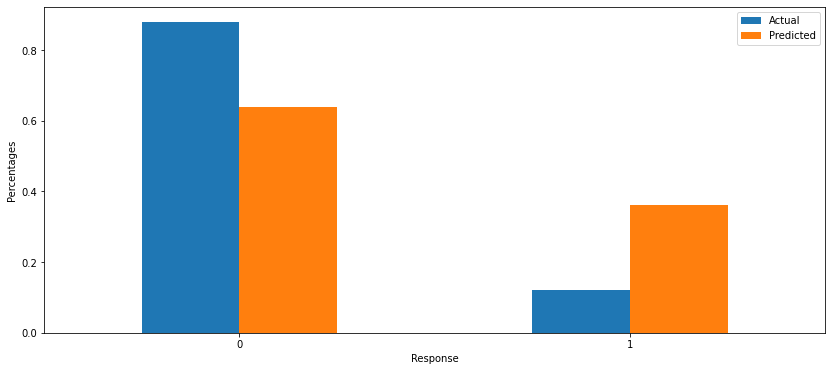

In [34]:
get_metric(gaussian_estimator)

In [35]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train_df_pca,y_train_series.values.reshape(-1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

The classification report for training is 

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    267427
           1       0.70      0.98      0.82    267427

    accuracy                           0.78    534854
   macro avg       0.83      0.78      0.78    534854
weighted avg       0.83      0.78      0.78    534854
 

The classification report for testing is 

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66972
           1       0.25      0.98      0.39      9250

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222
 

Confusion Matrix for train set 
 [[158010 109417]
 [  6073 261354]] 

Confusion Matrix for train set 
 [[39540 27432]
 [  223  9027]] 



,Train,Test
Roc Auc,0.78,0.78
Accuracy,0.78,0.64
Recall,0.98,0.98
Precision,0.70,0.25
Log loss,7.46,12.53
F1 score,0.82,0.39


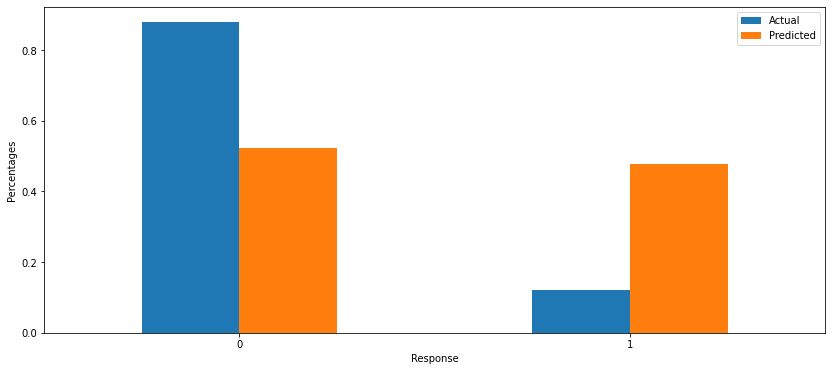

In [36]:
get_metric(clf)

In [37]:
logistic = LogisticRegression()
scoring = ['accuracy']
scores = cross_validate(logistic,X_train_df_pca, y_train_series, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  ................................................................
[CV] ............. , accuracy=(train=0.784, test=0.784), total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.784, test=0.784), total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.784, test=0.785), total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.785, test=0.782), total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............. , accuracy=(train=0.784, test=0.785), total=   1.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s finished


In [38]:
scores['train_accuracy']

array([0.78412557, 0.78398768, 0.78395029, 0.78452988, 0.78376616])

In [39]:
scores['test_accuracy']

array([0.78385731, 0.78440886, 0.78455843, 0.78224005, 0.78529494])

In [40]:
for model in scores['estimator']:
    print(model.coef_)

[[-2.64596574 -2.73424171 -0.00824278 -0.36270498 -0.00913569  0.09213549]]
[[-2.64096456 -2.7315934  -0.01989768 -0.36042262  0.0174577   0.10253883]]
[[-2.63635843 -2.71544811 -0.01115575 -0.37073087 -0.00471031  0.11333554]]
[[-2.6574838  -2.74244613 -0.00686886 -0.36236641 -0.00973438  0.1062983 ]]
[[-2.64048121 -2.72362094 -0.01062074 -0.37876287  0.00456784  0.09633559]]
